## Lab 7: $k$-means
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Exercise 1
- Download the ```breast_cancer.csv``` dataset and preprocess it by using ```sklearn.preprocessing.OrdinalEncoder``` to properly deal with the categorical variables. 

In [2]:
df = pd.read_csv("../Datasets/breast_cancer.csv", header=None)
df.head()

feature_names = ['age', ' menopause', 'tumor-size','inv-nodes', 'node-caps', 'deg-malign', ' breast', 'breast-quad', 'irradiat']
#Attribute Information derived from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer
#   0. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
#   1. menopause: lt40, ge40, premeno.
#   2. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,
#                  45-49, 50-54, 55-59.
#   3. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,
#                 27-29, 30-32, 33-35, 36-39.
#   4. node-caps: yes, no.
#   5. deg-malig: 1, 2, 3.
#   6. breast: left, right.
#   7. breast-quad: left-up, left-low, right-up,	right-low, central.
#   8. irradiat:	yes, no.
#   9. Class: no-recurrence-events, recurrence-events

In [3]:
df = df.astype(str)

In [4]:
encoder = OrdinalEncoder()
encoder.fit(np.array(df))
data = encoder.transform(df)

In [5]:
data

array([[2., 2., 2., ..., 2., 0., 1.],
       [3., 0., 2., ..., 0., 0., 0.],
       [3., 0., 6., ..., 1., 0., 1.],
       ...,
       [1., 2., 5., ..., 4., 0., 0.],
       [3., 2., 2., ..., 1., 0., 0.],
       [3., 0., 7., ..., 4., 0., 0.]])

In [6]:
X = data[:,0:9]
y = data[:,9] #in this way we have preprocessed also the response variable all at once

- Write your own function to compute the Mutual Information Criterion.
- Compute the Mutual Information between the covariates and the response variable (stored in the last column). Which features appear to be the most significant?

In [7]:
from sklearn.feature_selection import mutual_info_classif

In [8]:
MI = mutual_info_classif(X, y, discrete_features=True) 

In [9]:
MI

array([0.00735149, 0.00138741, 0.039628  , 0.04782375, 0.03702975,
       0.05337916, 0.00172524, 0.01044339, 0.01789638])

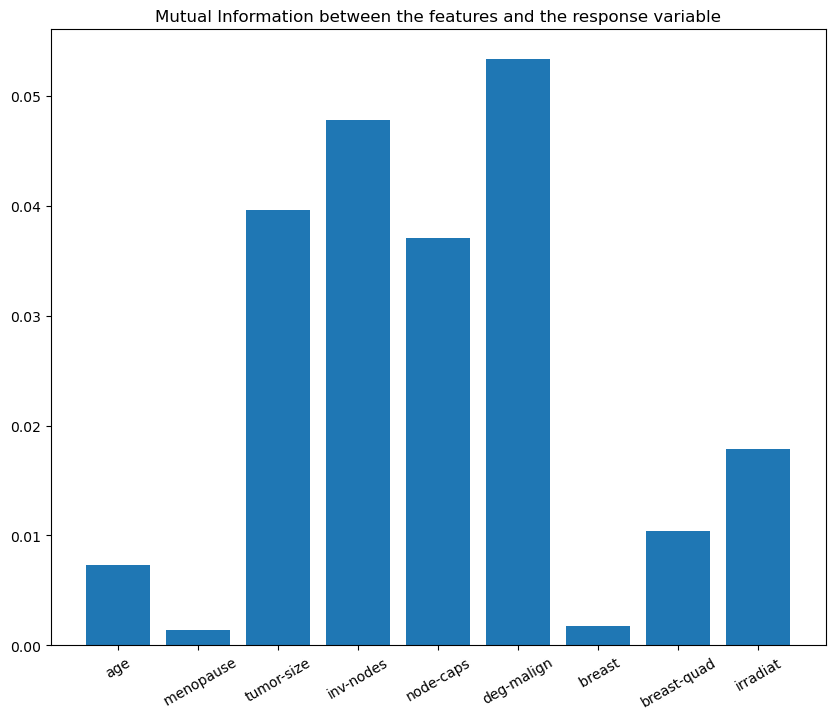

In [10]:
plt.figure(figsize=(10,8))

plt.bar(feature_names, MI)
plt.xticks(rotation=30)
plt.title("Mutual Information between the features and the response variable")
plt.show()

# Exercise 2
- Use the dataset ```s3.txt``` available in the ```Datasets``` folder.

In [11]:
s3 = np.genfromtxt("../Datasets/s3.txt")
s3

array([[453320., 606542.],
       [520651., 594591.],
       [516664., 660290.],
       ...,
       [351482., 334662.],
       [341057., 341338.],
       [374464., 284441.]])

In [12]:
s3.shape

(5000, 2)

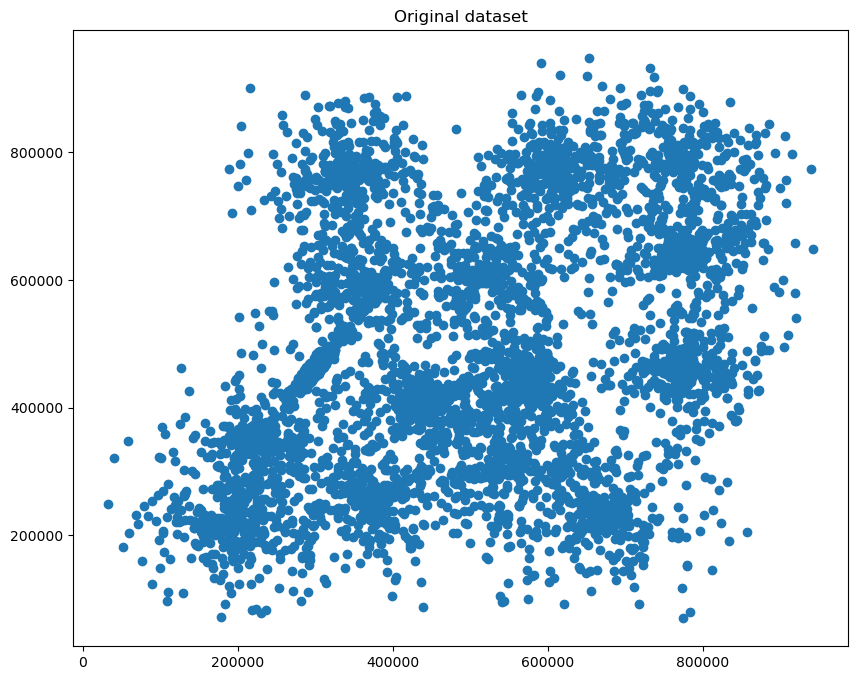

In [13]:
plt.figure(figsize=(10,8))

plt.scatter(s3[:,0], s3[:,1])
plt.title("Original dataset")
plt.show()

- Write your own implementation of the $k$-means clustering algorithm. 
- Test your implementation with 10 different inizializations and $k=15$.

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=15, init='random', n_init=1)
# init = {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features)
# default: 'k-means++'
# 'random': choose n_clusters observations (rows) at random from data for the initial centroids

# n_init: 'auto' or int, default n_init=10
# Number of times the k-means algorithm is run with different centroid seeds: The final result is the best output of n_init consecutive runs in terms of inertia.
# n_init=10 if init='random'
# n_init=1 if init='k-means++'

In [16]:
results = []

for i in range(10):
    kmeans = KMeans(n_clusters=15, init='random', n_init=1)
    kmeans.fit(s3)
    results.append((kmeans.inertia_, kmeans))


#kmeans.inertia_ : sum of distances of samples to their closest cluster center

In [17]:
results

[(21127373874202.562, KMeans(init='random', n_clusters=15, n_init=1)),
 (21362378841308.973, KMeans(init='random', n_clusters=15, n_init=1)),
 (18896672586045.156, KMeans(init='random', n_clusters=15, n_init=1)),
 (16889657409922.389, KMeans(init='random', n_clusters=15, n_init=1)),
 (18897069948003.17, KMeans(init='random', n_clusters=15, n_init=1)),
 (16892207237068.314, KMeans(init='random', n_clusters=15, n_init=1)),
 (21329502928122.926, KMeans(init='random', n_clusters=15, n_init=1)),
 (18684325368538.973, KMeans(init='random', n_clusters=15, n_init=1)),
 (19237755067119.117, KMeans(init='random', n_clusters=15, n_init=1)),
 (18683815140745.34, KMeans(init='random', n_clusters=15, n_init=1))]

- Plot the clustering results for which the loss is, respectively, the highest and the lowest.

In [18]:
sorted_results = sorted(results, key = lambda x : x[0])

In [19]:
sorted_results

[(16889657409922.389, KMeans(init='random', n_clusters=15, n_init=1)),
 (16892207237068.314, KMeans(init='random', n_clusters=15, n_init=1)),
 (18683815140745.34, KMeans(init='random', n_clusters=15, n_init=1)),
 (18684325368538.973, KMeans(init='random', n_clusters=15, n_init=1)),
 (18896672586045.156, KMeans(init='random', n_clusters=15, n_init=1)),
 (18897069948003.17, KMeans(init='random', n_clusters=15, n_init=1)),
 (19237755067119.117, KMeans(init='random', n_clusters=15, n_init=1)),
 (21127373874202.562, KMeans(init='random', n_clusters=15, n_init=1)),
 (21329502928122.926, KMeans(init='random', n_clusters=15, n_init=1)),
 (21362378841308.973, KMeans(init='random', n_clusters=15, n_init=1))]

In [20]:
kmeans_min = sorted_results[0][1]
kmeans_max = sorted_results[len(sorted_results)-1][1]

In [21]:
labels_min= kmeans_min.labels_
centers_min = kmeans_min.cluster_centers_

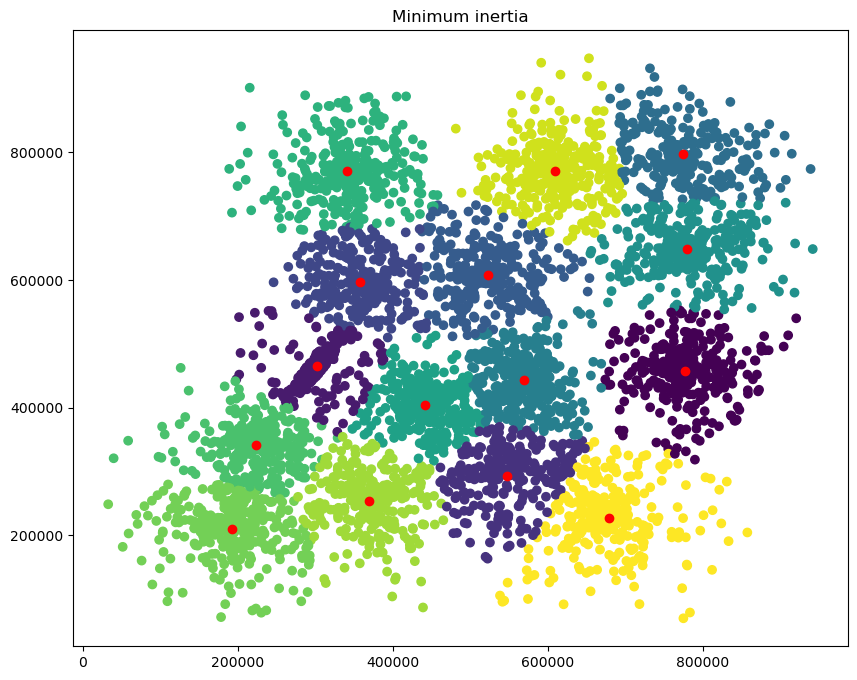

In [22]:
plt.figure(figsize=(10,8))

plt.scatter(s3[:,0], s3[:,1], c=labels_min)
plt.plot(centers_min[:,0], centers_min[:,1], 'ro')
plt.title("Minimum inertia")
plt.show()

In [23]:
labels_max= kmeans_max.labels_
centers_max = kmeans_max.cluster_centers_

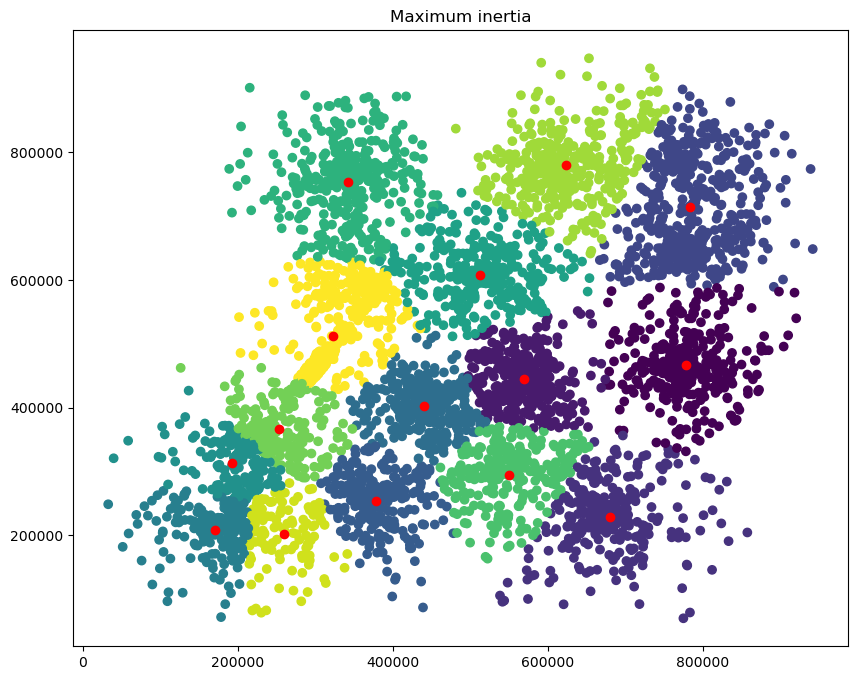

In [24]:
plt.figure(figsize=(10,8))

plt.scatter(s3[:,0], s3[:,1], c=labels_max)
plt.plot(centers_max[:,0], centers_max[:,1], 'ro')
plt.title("Maximum inertia")
plt.show()